In [133]:
import numpy as np
import torch
from torch import nn
import tqdm

In [134]:
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split


In [135]:
torch.cuda.is_available()

True

In [136]:
## DATA PREPARATION
# Use the following code to load and normalize the dataset for training and testing
# It will downlad the dataset into data subfolder (change to your data folder name)
train_dataset = torchvision.datasets.FashionMNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

test_dataset = torchvision.datasets.FashionMNIST('data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))


# Use the following code to create a validation set of 10%
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_dataset)),
    train_dataset.targets,
    stratify=train_dataset.targets,
    test_size=0.1,
)

# Generate training and validation subsets based on indices
train_split = Subset(train_dataset, train_indices)
val_split = Subset(train_dataset, val_indices)


# set batches sizes
train_batch_size = 512 #Define train batch size
test_batch_size  = 256 #Define test batch size (can be larger than train batch size)


# Define dataloader objects that help to iterate over batches and samples for
# training, validation and testing
train_batches = DataLoader(train_split, batch_size=train_batch_size, shuffle=True)
val_batches = DataLoader(val_split, batch_size=train_batch_size, shuffle=True)
test_batches = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=True)

num_train_batches=len(train_batches)
num_val_batches=len(val_batches)
num_test_batches=len(test_batches)


print("num_train_batches = " + str(num_train_batches))
print("num_val_batches = " + str(num_val_batches))
print("num_test_batches = " + str(num_test_batches))


# Sample code to visualize the first sample in first 16 batches
# batch_num = 0
# for train_features, train_labels in train_batches:

#     if batch_num == 16:
#         break    # break here

#     batch_num = batch_num +1
#     print(f"Feature batch shape: {train_features.size()}")
#     print(f"Labels batch shape: {train_labels.size()}")

#     img = train_features[0].squeeze()
#     label = train_labels[0]
#     plt.imshow(img, cmap="gray")
#     plt.show()
#     print(f"Label: {label}")



# Sample code to plot N^2 images from the dataset
# def plot_images(XX, N, title):
#     fig, ax = plt.subplots(N, N, figsize=(8, 8))

#     for i in range(N):
#       for j in range(N):
#         ax[i,j].imshow(XX[(N)*i+j], cmap="Greys")
#         ax[i,j].axis("off")
#     fig.suptitle(title, fontsize=24)

# plot_images(train_dataset.data[:64], 8, "First 64 Training Images" )

num_train_batches = 106
num_val_batches = 12
num_test_batches = 40


In [137]:
def data_loader(train_batch_size, test_batch_size):
    # Define dataloader objects that help to iterate over batches and samples for
    # training, validation and testing
    train_batches = DataLoader(train_split, batch_size=train_batch_size, shuffle=True)
    val_batches = DataLoader(val_split, batch_size=train_batch_size, shuffle=True)
    test_batches = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=True)

    num_train_batches=len(train_batches)
    num_val_batches=len(val_batches)
    num_test_batches=len(test_batches)


    print("num_train_batches = " + str(num_train_batches))
    print("num_val_batches = " + str(num_val_batches))
    print("num_test_batches = " + str(num_test_batches))

    return train_batches, val_batches, test_batches, num_train_batches, num_val_batches, num_test_batches

In [138]:
# ## MODEL DEFINITION (baseline)

# class ACAIGFCN(nn.Module):

#     #Initialize model layers, add additional arguments to adjust
#     def __init__(self, input_dim, output_dim, hidden_dims):

#         self.hidden_dims = hidden_dims
#         super(ACAIGFCN, self).__init__()


#         #Define the network layer(s) and activation function(s)

#         self.input_layer = nn.Linear(input_dim, hidden_dims[0])

#         self.hidden_layers = nn.ModuleList()
#         for k in range(len(hidden_dims) - 1):
#             self.hidden_layers.append(nn.Linear(hidden_dims[k], hidden_dims[k + 1]))

#         self.output_layer = nn.Linear(hidden_dims[-1], output_dim)


#     def forward(self, input):
#         #Define how your model propagates the input through the network

#         x = torch.nn.functional.relu(self.input_layer(input))

#         for k in range(len(self.hidden_dims) - 1):
#             x = torch.nn.functional.relu(self.hidden_layers[k](x))

#         output = self.output_layer(x)



#         return output

In [139]:
# ## PARAMETERS (baseline)
# # Initialize neural network model with input, output and hidden layer dimensions
# model = ACAIGFCN(input_dim = 784, output_dim = 10, hidden_dims = [400, 400]) # <--- <---
# print(model)

# # Define the learning rate and epochs number
# learning_rate = 0.03 # <---
# epochs = 40 # <---

# # Define loss function  and optimizer
# loss_func = torch.nn.CrossEntropyLoss() # Use Cross Entropy loss from torch.nn
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) # <--- Use optimizers from torch.optim

# ## Re-adjust number of training batches
# # set batch sizes
# train_batch_size = 512 # <--- Define train batch size
# test_batch_size  = 256 #Define test batch size (can be larger than train batch size)

# train_batches, val_batches, test_batches, num_train_batches, num_val_batches, num_test_batches = data_loader(train_batch_size, test_batch_size)

# # Identify tracked values
# train_loss_list = np.zeros((epochs,))
# validation_accuracy_list = np.zeros((epochs,))

# # For PyTorch GPU version
# if torch.cuda.is_available():
#   model.cuda()

In [140]:
## MODEL DEFINITION (As Cool As It Gets)

class ACAIGFCN(nn.Module):

    #Initialize model layers, add additional arguments to adjust
    def __init__(self, input_dim, output_dim, hidden_dims, dropout):

        self.hidden_dims = hidden_dims
        super(ACAIGFCN, self).__init__()


        #Define the network layer(s) and activation function(s)

        self.input_layer = nn.Linear(input_dim, hidden_dims[0])

        self.dropout_after_input = nn.Dropout(dropout)
        print(dropout)

        self.hidden_layers = nn.ModuleList()
        self.dropouts = nn.ModuleList()
        for k in range(len(hidden_dims) - 1):
            self.hidden_layers.append(nn.Linear(hidden_dims[k], hidden_dims[k + 1]))
            self.dropouts.append(nn.Dropout(dropout))

        self.output_layer = nn.Linear(hidden_dims[-1], output_dim)


    def forward(self, input):
        #Define how your model propagates the input through the network

        x = torch.nn.functional.relu(self.input_layer(input))

        x = self.dropout_after_input(x)

        for k in range(len(self.hidden_dims) - 1):
            x = torch.nn.functional.relu(self.hidden_layers[k](x))

            x = self.dropouts[k](x)

        output = self.output_layer(x)



        return output

In [141]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.normal(m.weight)

In [142]:
## PARAMETERS (As Cool As It Gets)
# Initialize neural network model with input, output and hidden layer dimensions
model = ACAIGFCN(input_dim = 784, output_dim = 10, hidden_dims = [400, 400], dropout = 0.2) # <--- <--- <---
print(model)

# Define the learning rate and epochs number
learning_rate = 0.001 # <---
epochs = 20 # <---

# Define loss function  and optimizer
loss_func = torch.nn.CrossEntropyLoss() # Use Cross Entropy loss from torch.nn
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate) # <--- Use optimizers from torch.optim

# Initialize weights of all FCN layers
model.apply(init_weights)

## Re-adjust number of training batches
# set batch sizes
train_batch_size = 512 # <--- Define train batch size
test_batch_size  = 256 #Define test batch size (can be larger than train batch size)

train_batches, val_batches, test_batches, num_train_batches, num_val_batches, num_test_batches = data_loader(train_batch_size, test_batch_size)

# Identify tracked values
train_loss_list = np.zeros((epochs,))
validation_accuracy_list = np.zeros((epochs,))

# For PyTorch GPU version
if torch.cuda.is_available():
  model.cuda()

0.2
ACAIGFCN(
  (input_layer): Linear(in_features=784, out_features=400, bias=True)
  (dropout_after_input): Dropout(p=0.2, inplace=False)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=400, out_features=400, bias=True)
  )
  (dropouts): ModuleList(
    (0): Dropout(p=0.2, inplace=False)
  )
  (output_layer): Linear(in_features=400, out_features=10, bias=True)
)
num_train_batches = 106
num_val_batches = 12
num_test_batches = 40


<ipython-input-141-160157a1c20e>:3: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(m.weight)


In [143]:
## TRAIN MODEL
# Iterate over epochs, batches with progress bar and train+ validate the ACAIGFCN
# Track the loss and validation accuracy
for epoch in tqdm.trange(epochs):

    # ACAIGFCN Training
    for train_features, train_labels in train_batches:

        # Transfer data to GPU memory
        if torch.cuda.is_available():
          train_features = train_features.cuda()
          train_labels = train_labels.cuda()

        # Set model into training mode
        model.train()

        # Reshape images into a vector
        train_features = train_features.reshape(-1, 28*28)

        # Reset gradients, Calculate training loss on model
        optimizer.zero_grad()
        train_outputs = model(train_features)
        loss = loss_func(train_outputs, train_labels)
        train_loss_list[epoch] += loss.item() / num_train_batches

        # Perform optimization, back propagation
        loss.backward()
        optimizer.step()

    # Record loss for the epoch (ALREADY DONE ABOVE)

    # ACAIGFCN Validation
    for val_features, val_labels in val_batches:

        # Transfer data to GPU memory
        if torch.cuda.is_available():
          val_features = val_features.cuda()
          val_labels = val_labels.cuda()

        # Telling PyTorch we aren't passing inputs to network for training purpose
        with torch.no_grad():
            model.eval()

            # Reshape validation images into a vector
            val_features = val_features.reshape(-1, 28*28)

            # Compute validation outputs (targets)
            # and compute accuracy
            val_outputs = model(val_features)
            correct = (torch.argmax(val_outputs, dim = 1) == val_labels).type(torch.FloatTensor)
            validation_accuracy_list[epoch] += correct.mean() / num_val_batches

    # Record accuracy for the epoch; print training loss, validation accuracy
    # print("Epoch: "+ str(epoch) +"; Validation Accuracy:" + str(val_acc/num_val_batches*100) + '%')
    print("Epoch: "+ str(epoch))
    print("Training Loss:" + str(round(train_loss_list[epoch], 2)))
    print("Validation Accuracy:" + str(round(validation_accuracy_list[epoch] * 100, 2)) + '%')

  5%|▌         | 1/20 [00:12<03:57, 12.52s/it]

Epoch: 0
Training Loss:3136.85
Validation Accuracy:76.75%


 10%|█         | 2/20 [00:25<03:48, 12.72s/it]

Epoch: 1
Training Loss:1090.2
Validation Accuracy:80.08%


 15%|█▌        | 3/20 [00:37<03:32, 12.47s/it]

Epoch: 2
Training Loss:736.96
Validation Accuracy:81.23%


 20%|██        | 4/20 [00:49<03:18, 12.39s/it]

Epoch: 3
Training Loss:549.27
Validation Accuracy:81.57%


 25%|██▌       | 5/20 [01:02<03:04, 12.32s/it]

Epoch: 4
Training Loss:431.68
Validation Accuracy:81.89%


 30%|███       | 6/20 [01:15<02:57, 12.70s/it]

Epoch: 5
Training Loss:360.58
Validation Accuracy:81.54%


 35%|███▌      | 7/20 [01:29<02:48, 12.98s/it]

Epoch: 6
Training Loss:305.2
Validation Accuracy:81.93%


 40%|████      | 8/20 [01:42<02:38, 13.24s/it]

Epoch: 7
Training Loss:267.99
Validation Accuracy:82.06%


 45%|████▌     | 9/20 [01:55<02:24, 13.11s/it]

Epoch: 8
Training Loss:235.4
Validation Accuracy:81.89%


 50%|█████     | 10/20 [02:08<02:08, 12.90s/it]

Epoch: 9
Training Loss:207.38
Validation Accuracy:81.51%


 55%|█████▌    | 11/20 [02:20<01:55, 12.83s/it]

Epoch: 10
Training Loss:181.57
Validation Accuracy:80.91%


 60%|██████    | 12/20 [02:33<01:41, 12.69s/it]

Epoch: 11
Training Loss:158.28
Validation Accuracy:79.91%


 65%|██████▌   | 13/20 [02:45<01:28, 12.62s/it]

Epoch: 12
Training Loss:140.04
Validation Accuracy:79.14%


 70%|███████   | 14/20 [02:58<01:15, 12.59s/it]

Epoch: 13
Training Loss:125.08
Validation Accuracy:77.93%


 75%|███████▌  | 15/20 [03:10<01:02, 12.56s/it]

Epoch: 14
Training Loss:106.87
Validation Accuracy:77.24%


 80%|████████  | 16/20 [03:22<00:49, 12.50s/it]

Epoch: 15
Training Loss:95.96
Validation Accuracy:76.16%


 85%|████████▌ | 17/20 [03:35<00:37, 12.52s/it]

Epoch: 16
Training Loss:83.88
Validation Accuracy:75.06%


 90%|█████████ | 18/20 [03:47<00:24, 12.46s/it]

Epoch: 17
Training Loss:76.77
Validation Accuracy:74.28%


 95%|█████████▌| 19/20 [04:00<00:12, 12.52s/it]

Epoch: 18
Training Loss:69.49
Validation Accuracy:73.57%


100%|██████████| 20/20 [04:13<00:00, 12.67s/it]

Epoch: 19
Training Loss:63.33
Validation Accuracy:72.72%


In [144]:
## TESTING
# Calculate accuracy on test set
test_accuracy = 0
batch_acc = np.zeros(num_test_batches)
k = 0

# Telling PyTorch we aren't passing inputs to network for training purpose
with torch.no_grad():

    for test_features, test_labels in test_batches:

        # Transfer data to GPU memory
        if torch.cuda.is_available():
          test_features = test_features.cuda()
          test_labels = test_labels.cuda()

        model.eval()
        # Reshape test images into a vector
        test_features = test_features.reshape(-1, 28*28)

        # Compute validation outputs (targets)
        # and compute accuracy
        test_preds = model(test_features)
        correct = (torch.argmax(test_preds, dim = 1) == test_labels).type(torch.FloatTensor)
        test_accuracy += correct.mean() / num_test_batches
        batch_acc[k] = correct.mean().numpy()
        k += 1


    # Compute total (mean) accuracy
    # Report total (mean) accuracy, can also compute std based on batches
    print("Testing Accuracy: " + str(round(test_accuracy.numpy() * 100, 2)) + '%')
    print("Standard Deviation: " + str(round(batch_acc.std() * 100, 2)) + '%')

Testing Accuracy: 72.41%
Standard Deviation: 3.22%


In [147]:
# random_normal_train = train_loss_list
# random_normal_val = validation_accuracy_list

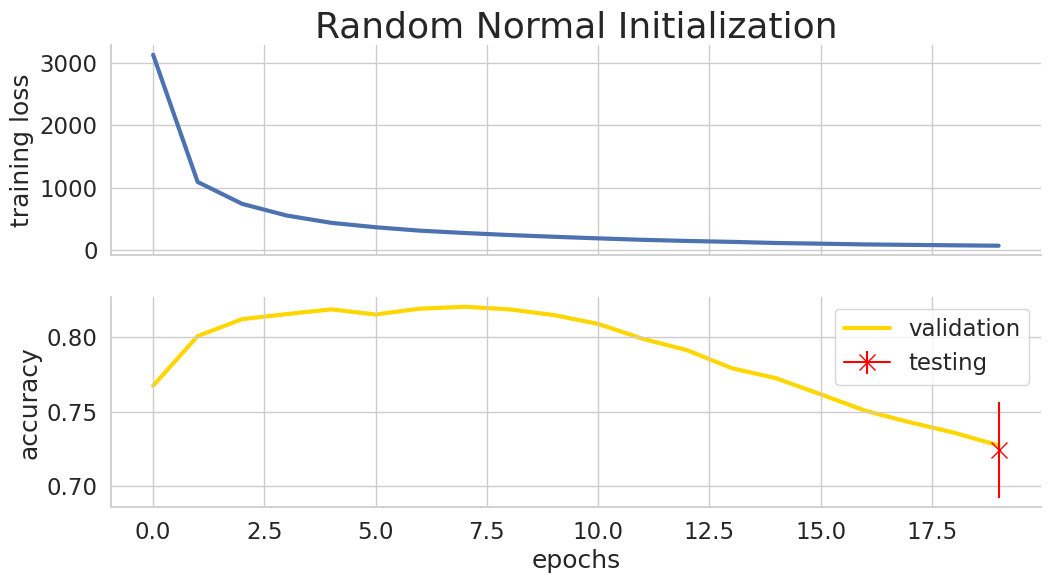

In [162]:
## VISUALIZATION
trial_no = 3
# Plot training loss and validation accuracy throughout the training epochs
import seaborn as sns
sns.set(style = 'whitegrid', font_scale = 1.5)

plt.figure(figsize = (12, 6))

plt.subplot(2, 1, 1)
plt.plot(train_loss_list, linewidth = 3)
plt.ylabel("training loss")
# plt.title("Trial " + str(trial_no), fontsize = 26)
plt.title("Random Normal Initialization", fontsize = 26)
plt.tick_params(axis = 'x', labelbottom = False)
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)

plt.subplot(2, 1, 2)
plt.plot(validation_accuracy_list, linewidth = 3, color = 'gold', zorder = 0, label = "validation")
plt.ylabel("accuracy")
plt.yticks(np.linspace(0, 1, 21))
plt.xlabel("epochs")
plt.errorbar(epochs - 1, test_accuracy.numpy(), batch_acc.std(), c = 'red', fmt = '-x', markersize = 12, linewidth = 1.5, zorder = 10, label = 'testing')
# plt.axhline(0.85, c = 'grey', linewidth = 1, linestyle = '--', zorder = 5, label = "85%")
plt.legend(loc = 'upper right')

sns.despine()

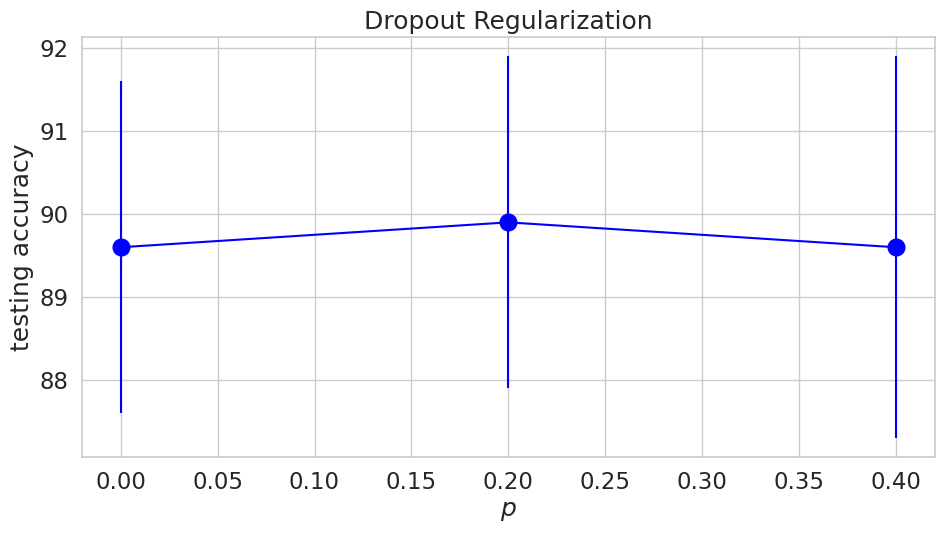

In [160]:
plt.figure(figsize = (11, 12))

plt.subplot(2, 1, 1)
plt.errorbar([0, 0.2, 0.4], [89.6, 89.9, 89.6], [2.0, 2.0, 2.3], c = 'blue', fmt = '-o', markersize = 12, linewidth = 1.5, zorder = 10, label = 'testing')
plt.xlabel("$p$")
plt.ylabel("testing accuracy")
plt.title("Dropout Regularization")
plt.show()